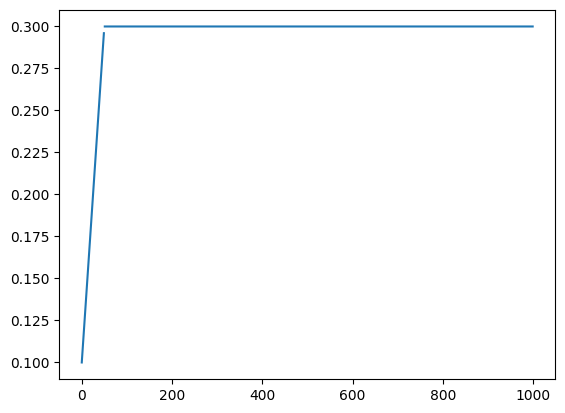

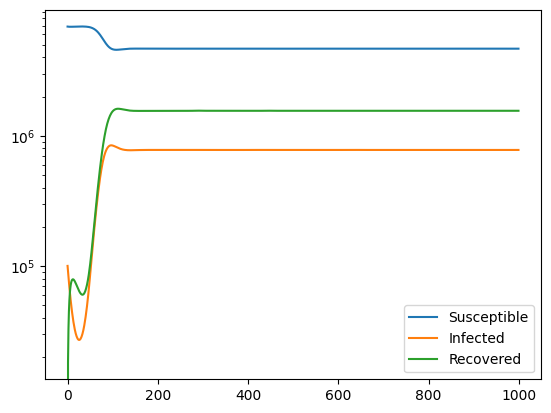

In [3]:
import sympy as sym
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

'''This is the model, N is the total population'''
N = 7_000_000

def beta_func(t): 
    if(t<50): 
        return 0.1 + 0.004 * (t); 
    if(t>50): 
        return 0.3



betas= np.array([beta_func(t) for t in range(1000)])
plt.plot(betas)
plt.show()

def RHS(t,state,beta,gamma,eta):
        
    S,I,R = state

    dS = -beta(t)*S * I/N + eta * R
    dI = beta(t)*S*I/N - gamma * I
    dR = gamma * I - eta* R
 
    return np.array([dS,dI,dR])
    

# C  = sym.symbols('state[0], state[1],state[2]')
# t0 = sym.symbols('t0')
# beta = sym.symbols('beta')
# gamma = sym.symbols('gamma')
# ydot = RHS(t0,C,beta,gamma)
# J = sym.Matrix(ydot).jacobian(C) 
# J_func = sym.lambdify((t0,C,beta,gamma), J)


initial_infected = 100_000
t_span = (0.0, 1000.0)
y0 = [7_000_000-initial_infected,initial_infected,0]
result_solve_ivp = solve_ivp(RHS, t_span, y0,args=(beta_func,0.2,0.1),t_eval = np.linspace(0,1000,1000))

labels = ['Susceptible','Infected','Recovered']

sim_data = result_solve_ivp.y[1,:]
plt.yscale('log')
for i in range(3): 
    plt.plot(np.arange(0,1000),result_solve_ivp.y[i,:],label = labels[i])

plt.legend()

pd.DataFrame(sim_data).to_csv('../datasets/SIR_SIM_DATA.csv')


